In [1]:
import theano
print(theano.__version__)

1.0.2


In [2]:
import keras
print(keras.__version__)

2.2.2


Using Theano backend.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
#import dataset 
dataset = pd.read_csv('./data/Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X_pd = dataset.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
Y_pd = X_pd.Exited
X_pd = X_pd.drop(['Exited'], axis=1)
X_pd.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
Y_pd.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X_pd.Gender = labelencoder_X_1.fit_transform(X_pd.Gender)
X_pd.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [9]:
# Convert Geography column to dummy variable
geography = pd.get_dummies(X_pd.Geography, prefix='Geography')
X_pd = X_pd.drop(['Geography'], axis=1)
X_pd = pd.concat([X_pd, geography], axis=1)

# we should drop one of the columns
X_pd = X_pd.drop(['Geography_France'], axis=1)
X_pd.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pd, Y_pd,test_size=0.2)

In [11]:
X_train.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9259,800,0,40,3,75893.11,2,1,0,132562.23,0,0
5799,625,0,45,3,0.00,1,1,1,184474.15,0,0
7930,500,1,38,7,0.00,2,0,0,192013.23,0,1


In [12]:
y_train.head(3)

9259    0
5799    1
7930    0
Name: Exited, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [14]:
from keras import layers
from keras.models import Model
from keras.utils import plot_model
import matplotlib.image as mpimg
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

C:\Users\Marchelo\Anaconda3\envs\keras.theano\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_1, outputs=sigmoid.0)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None


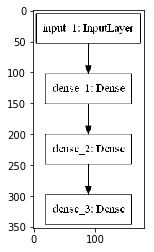

In [15]:
visible = layers.Input(shape=(11,))
hidden1 = layers.Dense(11, kernel_initializer='glorot_normal', activation='relu')(visible)
hidden2 = layers.Dense(6, kernel_initializer='glorot_normal', activation='relu')(hidden1)
output = layers.Dense(1, kernel_initializer='glorot_normal', activation='sigmoid')(hidden2)

model = Model(inputs=visible, output=output)
# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')
image = mpimg.imread("multilayer_perceptron_graph.png")
plt.imshow(image)
plt.show()

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.4865 - acc: 0.7917
Epoch 2/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.4327 - acc: 0.8056
Epoch 3/100
8000/8000 [==============================] - 0s 36us/step - loss: 0.4135 - acc: 0.8224
Epoch 4/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.4024 - acc: 0.8285
Epoch 5/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.3946 - acc: 0.8295
Epoch 6/100
8000/8000 [==============================] - 0s 36us/step - loss: 0.3882 - acc: 0.8310
Epoch 7/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.3822 - acc: 0.8304
Epoch 8/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.3770 - acc: 0.8334
Epoch 9/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.3727 - acc: 0.8380
Epoch 10/100
8000/8000 [==============================] - 0s 36us/step - loss: 0.3686 - acc: 0.8427
Epoch 11/

8000/8000 [==============================] - 0s 35us/step - loss: 0.3284 - acc: 0.8645
Epoch 83/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.3284 - acc: 0.8660
Epoch 84/100
8000/8000 [==============================] - 0s 34us/step - loss: 0.3299 - acc: 0.8641
Epoch 85/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.3290 - acc: 0.8631
Epoch 86/100
8000/8000 [==============================] - 0s 39us/step - loss: 0.3285 - acc: 0.8659
Epoch 87/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.3291 - acc: 0.8649
Epoch 88/100
8000/8000 [==============================] - 0s 36us/step - loss: 0.3279 - acc: 0.8647
Epoch 89/100
8000/8000 [==============================] - 0s 38us/step - loss: 0.3290 - acc: 0.8644
Epoch 90/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.3289 - acc: 0.8641
Epoch 91/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.3281 - acc: 0.8639
Epoch 92/100


In [18]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
cm = confusion_matrix(y_test, y_pred)
f1s = f1_score(y_test, y_pred, average='weighted')

print("confusion matrix")
print(cm)
print("F1 score")
print(f1s)

confusion matrix
[[1538   67]
 [ 199  196]]
F1 score
0.8562861453837046


### References
- https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
- https://machinelearningmastery.com/keras-functional-api-deep-learning/
- https://keras.io/initializers/
- https://web.stanford.edu/class/cs20si/lectures/march9guestlecture.pdf
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html